# Lyric Analysis with spaCy

## Introduction

As an enthusiast of folk music, I have always been drawn to its captivating narratives, catchy lyrics, and simple melodies. Yet, as a non-professional in the field of music, I struggle to express the distinctiveness of folk music. Searching on the internet for "difference between folk and country music," I found results suggesting that Folk music encompasses diverse lyrical content, potentially involving social issues, personal experiences, or traditional stories. In contrast, Country music tends to focus more on rural life, love, family, and personal experiences. However, as music evolves, the boundaries between genres blur. Do the unique characteristics of lyrics in these two music genres still persist in their expression and content? This study aims to focus on the linguistic features at the lyrical level of folk and country music, delving into possible differences and their significance.

This research aims to enhance understanding of the cultural and linguistic expression variations among different musical genres. Through an in-depth analysis of lyrics, we might explore potential disparities between folk and country music in emotions, lexical choices, syntactic structures, and more, expanding our comprehension of cultural diversity within musical contexts.

### Dataset:

This research will rely on lyrics retrieved from [Genius](https://genius.com). Musicians selected are contemporary folk music figures mentioned on the Wikipedia [Contemporary folk music](https://en.wikipedia.org/wiki/Contemporary_folk_music): Woody Guthrie, Phil Ochs, Joan Baez, Bob Dylan, Neil Young, and one of my favorite contemporary folk-rock bands, Dawes. Using the Genius API, I downloaded one top-ranking album from each of these six musicians based on their popularity rankings on the Genius platform. As a comparative dataset, I chosed five albums from the Billboard Music Award for [Top Country Album](https://en.wikipedia.org/wiki/Billboard_Music_Award_for_Top_Country_Album) between 2006 and 2023, excluding duplicates among the awardees. The complete code utilized for data scraping is included within this notebook file, addressing any potential issues related to data retrieval and processing.

### Research Questions:

This study aims to delve deeper into the linguistic differences present in the lyrics of folk and country music, discerning the distinct characteristics of these two music genres at the lyrical level. Specific objectives include:

1. **Lexical and Linguistic Variations:** Comparing the vocabulary usage, syntactic structures, and linguistic expression styles within the lyrics of both music genres to explore potential differences.
   
2. **Cultural and Regional Features:** Investigating whether specific vocabulary or themes related to geography, culture, or history exist within the lyrics, revealing the cultural traits behind the music.
   
3. **Emotional and Thematic Differences:** Analyzing the emotions, themes, and cultural connotations conveyed in the lyrics to discuss how these aspects are emphasized and presented differently in the two music genres.

### Data Collection

In [121]:
import api_key

# Set up LyricsGenius with Genius API client access token
client_access_token = api_key.my_client_access_token

In [122]:
# Construct the Genius API search URL, using 'Dawes' as an example

search_term = "Dawes"

genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"

print(genius_search_url)

http://api.genius.com/search?q=Dawes&access_token=M7hhTPQLNgGa5MckW8tU01O_X05gwuIB8p0GJ4vep9QoUMmPCuNslZAF7iXvxVh0


In [123]:
import requests

#Retrieve data and display the JSON data fetched
response = requests.get(genius_search_url)
json_data = response.json()

json_data

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 7,
     'api_path': '/songs/741577',
     'artist_names': 'Dawes',
     'full_title': 'Things Happen by\xa0Dawes',
     'header_image_thumbnail_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.300x269x1.jpg',
     'header_image_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.500x449x1.jpg',
     'id': 741577,
     'lyrics_owner_id': 93685,
     'lyrics_state': 'complete',
     'path': '/Dawes-things-happen-lyrics',
     'pyongs_count': 4,
     'relationships_index_url': 'https://genius.com/Dawes-things-happen-sample',
     'release_date_components': {'year': 2015, 'month': 4, 'day': 6},
     'release_date_for_display': 'April 6, 2015',
     'release_date_with_abbreviated_month_for_display': 'Apr. 6, 2015',
     'song_art_image_thumbnail_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.300x269x

In [124]:
json_data['response']['hits'][0]

{'highlights': [],
 'index': 'song',
 'type': 'song',
 'result': {'annotation_count': 7,
  'api_path': '/songs/741577',
  'artist_names': 'Dawes',
  'full_title': 'Things Happen by\xa0Dawes',
  'header_image_thumbnail_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.300x269x1.jpg',
  'header_image_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.500x449x1.jpg',
  'id': 741577,
  'lyrics_owner_id': 93685,
  'lyrics_state': 'complete',
  'path': '/Dawes-things-happen-lyrics',
  'pyongs_count': 4,
  'relationships_index_url': 'https://genius.com/Dawes-things-happen-sample',
  'release_date_components': {'year': 2015, 'month': 4, 'day': 6},
  'release_date_for_display': 'April 6, 2015',
  'release_date_with_abbreviated_month_for_display': 'Apr. 6, 2015',
  'song_art_image_thumbnail_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.300x269x1.jpg',
  'song_art_image_url': 'https://images.genius.com/ad4d83a1b8e9700af1b1db50cc909865.500x449x1.j

In [125]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /private/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/pip-req-build-p605l4fi
  Running command git clone --filter=blob:none --quiet https://github.com/johnwmillr/LyricsGenius.git /private/var/folders/m8/l1x4t4d538zb5_2w0ryphgr40000gp/T/pip-req-build-p605l4fi
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit aac9dad201bc012bf83283c7de779b7d95498756
  Preparing metadata (setup.py) ... done


In [126]:
from bs4 import BeautifulSoup
import re
import lyricsgenius
import requests
from pathlib import Path

In [9]:
 # Creat a function to clean up song titles
    
LyricsGenius = lyricsgenius.Genius(client_access_token)

def clean_up(song_title):

    if "Ft" in song_title:
        before_ft_pattern = re.compile(".*(?=\(Ft)")
        song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        clean_song_title = song_title_before_ft.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    else:
        song_title_no_lyrics = song_title.replace("Lyrics", "")
        clean_song_title = song_title_no_lyrics.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    return clean_song_title

In [10]:
# Function to fetch all songs from a specified album of an artist

def get_all_songs_from_album(artist, album_name):
    
    artist = artist.replace(" ", "-")
    album_name = album_name.replace(" ", "-")
    
    response = requests.get(f"https://genius.com/albums/{artist}/{album_name}")
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    song_title_tags = document.find_all("h3", attrs={"class": "chart_row-content-title"})
    song_titles = [song_title.text for song_title in song_title_tags]
    
    clean_songs = []
    for song_title in song_titles:
        clean_song = clean_up(song_title)
        clean_songs.append(clean_song)
        
    return clean_songs

In [11]:
# Function to retrieve lyrics, organize and save them by song for a specified artist's album

def download_album_lyrics(artist, album_name):  
    
    LyricsGenius = lyricsgenius.Genius(client_access_token)
    LyricsGenius.remove_section_headers = True
    
    # Get all song titles for a particular artist's album
    clean_songs = get_all_songs_from_album(artist, album_name)  
    # List to store song information   
    data = [] 
    
    for song in clean_songs:
        
        # For each song in the list, search for that song with LyricsGenius
        song_object = LyricsGenius.search_song(song, artist)
          
        # If the song is not empty
        if song_object != None:
             
            # Do some cleaning and prep for the filename of the song
            artist_title = artist.replace(" ", "_")
            album_title = album_name.replace(" ", "_")
            song_title = song.replace("/", "_")
            song_title = song.replace(" ", "_")
            
            # Establish the filename for each song inside a directory that begins with the artist's name and album title
            custom_filename=f"{artist_title}_{album_title}/{song_title}"
            
            # A line of code that we need to create a directory
            Path(f"{artist_title}_{album_title}").mkdir(parents=True, exist_ok=True)
            
            # Save the lyrics for the song as a text file
            song_object.save_lyrics(filename=custom_filename, extension='txt', sanitize=False)

            # Fetch pageviews
            pageviews = getattr(song_object.stats, 'pageviews', 'Not Available')

            # Fetch lyrics
            lyrics = song_object.lyrics if song_object.lyrics else 'Lyrics not available'
            
            # Add song information with play count and pageviews to the data list
            data.append({
                'Artist': artist,
                'Album': album_name,
                'Title': song,
                'Filename': custom_filename,
                'Pageviews': pageviews,
                'Lyrics': lyrics
            })
            
        else:        
            print('No lyrics')
    
    # Convert the data list to a DataFrame
    df = pd.DataFrame(data)
    return df

In [39]:
#Test the function's functionality

download_album_lyrics("Dawes", "All Your Favorite Bands")

Searching for "Things Happen" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/Things_Happen.txt.
Searching for "Somewhere Along the Way" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/Somewhere_Along_the_Way.txt.
Searching for "Don't Send Me Away" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/Don't_Send_Me_Away.txt.
Searching for "All Your Favorite Bands" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/All_Your_Favorite_Bands.txt.
Searching for "I Can't Think About It Now" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/I_Can't_Think_About_It_Now.txt.
Searching for "To Be Completely Honest" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/To_Be_Completely_Honest.txt.
Searching for "Waiting For Your Call" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/Waiting_For_Your_Call.txt.
Searching for "Right On Time" by Dawes...
Done.
Wrote Dawes_All_Your_Favorite_Bands/Right_On_Time.txt.
Searching for "Now That It's Too Late, Maria" by Dawes...
Done.


,Artist,Album,Title,Filename,Pageviews,Lyrics
0,Dawes,All Your Favorite Bands,Things Happen,Dawes_All_Your_Favorite_Bands/Things_Happen,45554,Go\n\nI could go on talking or I could stop\nW...
1,Dawes,All Your Favorite Bands,Somewhere Along the Way,Dawes_All_Your_Favorite_Bands/Somewhere_Along_...,7456,She went from table manners to tunnel vision t...
2,Dawes,All Your Favorite Bands,Don't Send Me Away,Dawes_All_Your_Favorite_Bands/Don't_Send_Me_Away,Not Available,You can send me a message if you don’t want to...
3,Dawes,All Your Favorite Bands,All Your Favorite Bands,Dawes_All_Your_Favorite_Bands/All_Your_Favorit...,30166,Late night drives and hot french fries\nAnd fr...
4,Dawes,All Your Favorite Bands,I Can't Think About It Now,Dawes_All_Your_Favorite_Bands/I_Can't_Think_Ab...,Not Available,If you’re just asking for a reason\nReasons ar...
5,Dawes,All Your Favorite Bands,To Be Completely Honest,Dawes_All_Your_Favorite_Bands/To_Be_Completely...,Not Available,To be completely honest\nThe picture isn’t cle...
6,Dawes,All Your Favorite Bands,Waiting For Your Call,Dawes_All_Your_Favorite_Bands/Waiting_For_Your...,Not Available,When your restlessness has lost it’s way\nAnd ...
7,Dawes,All Your Favorite Bands,Right On Time,Dawes_All_Your_Favorite_Bands/Right_On_Time,5018,Ohh ohh ohhh\nOhh ohh ohhh\nOhh ohh ohhh\n\nIf...
8,Dawes,All Your Favorite Bands,"Now That It's Too Late, Maria",Dawes_All_Your_Favorite_Bands/Now_That_It's_To...,Not Available,The flicker of the candle looks like a one way...


In [10]:
# Download and process songs from multiple albums by different artists

def download_multiple_albums(artist_albums_dict):
    result_df = pd.DataFrame()  # Empty DataFrame to store results
    
    for artist, album_name in artist_albums_dict.items():
        # Download and process songs for each artist-album pair
        album_df = download_album_lyrics(artist, album_name)
        
        # Append the data to the result DataFrame
        result_df = pd.concat([result_df, album_df], ignore_index=True)
    
    return result_df

# Dictionary of artist-album combinations
artist_albums_dict = {
    'Woody Guthrie':'This Land Is Your Land',
    'Phil Ochs': 'There But For Fortune',
    'Joan Baez': 'The First Lady of Folk 1958-1961',
}

result_df_1 = download_multiple_albums(artist_albums_dict)

Searching for "Talking Columbia" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/Talking_Columbia.txt.
Searching for "Pastures Of Plenty" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/Pastures_Of_Plenty.txt.
Searching for "New Found Land" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/New_Found_Land.txt.
Searching for "Oregon Trail" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/Oregon_Trail.txt.
Searching for "End Of My Line" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/End_Of_My_Line.txt.
Searching for "This Land Is Your Land" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/This_Land_Is_Your_Land.txt.
Searching for "Song Of The Grand Coulee Dam" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/Song_Of_The_Grand_Coulee_Dam.txt.
Searching for "Ramblin' Round" by Woody Guthrie...
Done.
Wrote Woody_Guthrie_This_Land_Is_Your_Land/Ramblin'

Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/The_Trees_They_Do_Grow_High.txt.
Searching for "The Lily of the West" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/The_Lily_of_the_West.txt.
Searching for "Silkie" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Silkie.txt.
Searching for "Engine 143" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Engine_143.txt.
Searching for "Once I Knew a Pretty Girl" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Once_I_Knew_a_Pretty_Girl.txt.
Searching for "Lonesome Road" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Lonesome_Road.txt.
Searching for "Pal of Mine" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Pal_of_Mine.txt.
Searching for "Barbara Allen" by Joan Baez...
Done.
Wrote Joan_Baez_The_First_Lady_of_Folk_1958-1961/Barbara_Allen.txt.
Searching for "The Cherry Tree Carol" by Joan Baez...
Done

In [12]:
# Download in batches to avoid timeouts error in the Genius API
artist_albums_dict = {
    'Bob Dylan': 'Bringing It All Back Home',
    'Neil Young': 'Decade',
    'Dawes': 'All Your Favorite Bands',
}

# Download and process songs from multiple albums by different artists
result_df_2 = download_multiple_albums(artist_albums_dict)

Searching for "Subterranean Homesick Blues" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Subterranean_Homesick_Blues.txt.
Searching for "She Belongs to Me" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/She_Belongs_to_Me.txt.
Searching for "Maggie's Farm" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Maggie's_Farm.txt.
Searching for "Love Minus Zero-No Limit" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Love_Minus_Zero-No_Limit.txt.
Searching for "Outlaw Blues" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Outlaw_Blues.txt.
Searching for "On the Road Again" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/On_the_Road_Again.txt.
Searching for "Bob Dylan's 115th Dream" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Bob_Dylan's_115th_Dream.txt.
Searching for "Mr. Tambourine Man" by Bob Dylan...
Done.
Wrote Bob_Dylan_Bringing_It_All_Back_Home/Mr._Tambourine_Man.txt.
Se

In [14]:
folk_df = pd.concat([result_df_1, result_df_2], ignore_index=True)
folk_df

            Artist                    Album                          Title  \
0    Woody Guthrie   This Land Is Your Land               Talking Columbia   
1    Woody Guthrie   This Land Is Your Land             Pastures Of Plenty   
2    Woody Guthrie   This Land Is Your Land                 New Found Land   
3    Woody Guthrie   This Land Is Your Land                   Oregon Trail   
4    Woody Guthrie   This Land Is Your Land                 End Of My Line   
..             ...                      ...                            ...   
124          Dawes  All Your Favorite Bands     I Can't Think About It Now   
125          Dawes  All Your Favorite Bands        To Be Completely Honest   
126          Dawes  All Your Favorite Bands          Waiting For Your Call   
127          Dawes  All Your Favorite Bands                  Right On Time   
128          Dawes  All Your Favorite Bands  Now That It's Too Late, Maria   

                                              Filename      Pag

In [18]:
# Download the comparative lyrics

artist_albums_dict = {
    'Morgan Wallen':'One Thing at a Time',
    'Luke Combs': 'What You See Is What You Get',
    'Chris Stapleton':'Traveller'
}

# Download and process songs from multiple albums by different artists
result_df_3 = download_multiple_albums(artist_albums_dict)

Searching for "Born With A Beer In My Hand" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Born_With_A_Beer_In_My_Hand.txt.
Searching for "Last Night" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Last_Night.txt.
Searching for "Everything I Love" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Everything_I_Love.txt.
Searching for "Man Made A Bar" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Man_Made_A_Bar.txt.
Searching for "Devil Don’t Know" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Devil_Don’t_Know.txt.
Searching for "One Thing At A Time" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/One_Thing_At_A_Time.txt.
Searching for "‘98 Braves" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/‘98_Braves.txt.
Searching for "Ain’t That Some" by Morgan Wallen...
Done.
Wrote Morgan_Wallen_One_Thing_at_a_Time/Ain’t_That_Some.txt.
Searching for "I Wrote The Book"

In [21]:
# Download in batches
artist_albums_dict = {
    'Taylor Swift': 'Red',
    'Jason Aldean':'My Kinda Party',
}

result_df_4 = download_multiple_albums(artist_albums_dict)

Searching for "State of Grace" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/State_of_Grace.txt.
Searching for "Red" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/Red.txt.
Searching for "Treacherous" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/Treacherous.txt.
Searching for "I Knew You Were Trouble" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/I_Knew_You_Were_Trouble.txt.
Searching for "All Too Well" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/All_Too_Well.txt.
Searching for "22" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/22.txt.
Searching for "I Almost Do" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/I_Almost_Do.txt.
Searching for "We Are Never Ever Getting Back Together" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/We_Are_Never_Ever_Getting_Back_Together.txt.
Searching for "Stay Stay Stay" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/Stay_Stay_Stay.txt.
Searching for "The Last Time" by Taylor Swift...
Done.
Wrote Taylor_Swift_Red/The_Last_Time.txt.
Search

In [22]:
# Download in batches

artist_albums_dict = {
    'Carrie Underwood':'Some Hearts'
}

result_df_5 = download_multiple_albums(artist_albums_dict)

Searching for "Wasted" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Wasted.txt.
Searching for "Don't Forget to Remember Me" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Don't_Forget_to_Remember_Me.txt.
Searching for "Some Hearts" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Some_Hearts.txt.
Searching for "Jesus, Take the Wheel" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Jesus,_Take_the_Wheel.txt.
Searching for "The Night Before (Life Goes On)" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/The_Night_Before_(Life_Goes_On).txt.
Searching for "Lessons Learned" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Lessons_Learned.txt.
Searching for "Before He Cheats" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Before_He_Cheats.txt.
Searching for "Starts with Goodbye" by Carrie Underwood...
Done.
Wrote Carrie_Underwood_Some_Hearts/Starts_with_Goodbye.txt.
Searching fo

In [23]:
country_df = pd.concat([result_df_3, result_df_4,result_df_5], ignore_index=True)
country_df

               Artist                Album                        Title  \
0       Morgan Wallen  One Thing at a Time  Born With A Beer In My Hand   
1       Morgan Wallen  One Thing at a Time                   Last Night   
2       Morgan Wallen  One Thing at a Time            Everything I Love   
3       Morgan Wallen  One Thing at a Time               Man Made A Bar   
4       Morgan Wallen  One Thing at a Time             Devil Don’t Know   
..                ...                  ...                          ...   
111  Carrie Underwood          Some Hearts    We're Young and Beautiful   
112  Carrie Underwood          Some Hearts           That's Where It Is   
113  Carrie Underwood          Some Hearts        Whenever You Remember   
114  Carrie Underwood          Some Hearts  I Ain't In Checotah Anymore   
115  Carrie Underwood          Some Hearts           Inside Your Heaven   

                                              Filename      Pageviews  \
0    Morgan_Wallen_One_Thi

In [11]:
# Merge into new DataFrame
country_df.insert(0, 'genre', 'country')
folk_df.insert(0, 'genre', 'folk')

metadata_df = pd.concat([country_df, folk_df], ignore_index=True)

metadata_df.head()

,Genre,Artist,Album,Title,Filename,Pageviews,Lyrics
0,country,Morgan Wallen,One Thing at a Time,Born With A Beer In My Hand,Morgan_Wallen_One_Thing_at_a_Time/Born_With_A_...,24727,"Granddaddy drank Heavy, and daddy drank Light\..."
1,country,Morgan Wallen,One Thing at a Time,Last Night,Morgan_Wallen_One_Thing_at_a_Time/Last_Night,245739,"Last night, we let the liquor talk\nI can't re..."
2,country,Morgan Wallen,One Thing at a Time,Everything I Love,Morgan_Wallen_One_Thing_at_a_Time/Everything_I...,62516,I wish I woulda met you anywhere but where I d...
3,country,Morgan Wallen,One Thing at a Time,Man Made A Bar,Morgan_Wallen_One_Thing_at_a_Time/Man_Made_A_Bar,33356,"I sat down on a barstool, like a dern fool\n'C..."
4,country,Morgan Wallen,One Thing at a Time,Devil Don’t Know,Morgan_Wallen_One_Thing_at_a_Time/Devil_Don’t_...,36815,There's a bottle on the King James coaster\nMi...


In [13]:
metadata_df.to_csv('metadata.csv', index=False)

### Importing spaCy and Preprocessing

In [1]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
file_path = 'metadata.csv' 
song_lyric_df = pd.read_csv(file_path)

song_lyric_df.head()

,Genre,Artist,Album,Title,Filename,Pageviews,Lyrics
0,country,Morgan Wallen,One Thing at a Time,Born With A Beer In My Hand,Morgan_Wallen_One_Thing_at_a_Time/Born_With_A_...,24727,"Granddaddy drank Heavy, and daddy drank Light\..."
1,country,Morgan Wallen,One Thing at a Time,Last Night,Morgan_Wallen_One_Thing_at_a_Time/Last_Night,245739,"Last night, we let the liquor talk\nI can't re..."
2,country,Morgan Wallen,One Thing at a Time,Everything I Love,Morgan_Wallen_One_Thing_at_a_Time/Everything_I...,62516,I wish I woulda met you anywhere but where I d...
3,country,Morgan Wallen,One Thing at a Time,Man Made A Bar,Morgan_Wallen_One_Thing_at_a_Time/Man_Made_A_Bar,33356,"I sat down on a barstool, like a dern fool\n'C..."
4,country,Morgan Wallen,One Thing at a Time,Devil Don’t Know,Morgan_Wallen_One_Thing_at_a_Time/Devil_Don’t_...,36815,There's a bottle on the King James coaster\nMi...


## Lyrics Enrichment with spaCy

### Creating Doc Objects

In [3]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

# Apply the function to the "Lyrics" column, so that the nlp pipeline is called on each song
song_lyric_df['Doc'] = song_lyric_df['Lyrics'].apply(process_text)

## Text Reduction

### Tokenization

In [4]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

# Run the token retrieval function on the doc objects in the dataframe
song_lyric_df['Tokens'] = song_lyric_df['Doc'].apply(get_token)
song_lyric_df.head()

,Genre,Artist,Album,Title,Filename,Pageviews,Lyrics,Doc,Tokens
0,country,Morgan Wallen,One Thing at a Time,Born With A Beer In My Hand,Morgan_Wallen_One_Thing_at_a_Time/Born_With_A_...,24727,"Granddaddy drank Heavy, and daddy drank Light\...","(Granddaddy, drank, Heavy, ,, and, daddy, dran...","[Granddaddy, drank, Heavy, ,, and, daddy, dran..."
1,country,Morgan Wallen,One Thing at a Time,Last Night,Morgan_Wallen_One_Thing_at_a_Time/Last_Night,245739,"Last night, we let the liquor talk\nI can't re...","(Last, night, ,, we, let, the, liquor, talk, \...","[Last, night, ,, we, let, the, liquor, talk, \..."
2,country,Morgan Wallen,One Thing at a Time,Everything I Love,Morgan_Wallen_One_Thing_at_a_Time/Everything_I...,62516,I wish I woulda met you anywhere but where I d...,"(I, wish, I, woulda, met, you, anywhere, but, ...","[I, wish, I, woulda, met, you, anywhere, but, ..."
3,country,Morgan Wallen,One Thing at a Time,Man Made A Bar,Morgan_Wallen_One_Thing_at_a_Time/Man_Made_A_Bar,33356,"I sat down on a barstool, like a dern fool\n'C...","(I, sat, down, on, a, barstool, ,, like, a, de...","[I, sat, down, on, a, barstool, ,, like, a, de..."
4,country,Morgan Wallen,One Thing at a Time,Devil Don’t Know,Morgan_Wallen_One_Thing_at_a_Time/Devil_Don’t_...,36815,There's a bottle on the King James coaster\nMi...,"(There, 's, a, bottle, on, the, King, James, c...","[There, 's, a, bottle, on, the, King, James, c..."


### Lemmatization

In [5]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
song_lyric_df['Lemmas'] = song_lyric_df['Doc'].apply(get_lemma)

print(f'"Sing" appears in the lyric tokens column ' + str(song_lyric_df['Tokens'].apply(lambda x: x.count('sing')).sum()) + ' times.')
print(f'"Sing" appears in the lemmas column ' + str(song_lyric_df['Lemmas'].apply(lambda x: x.count('sing')).sum()) + ' times.')

"Sing" appears in the lyric tokens column 21 times.
"Sing" appears in the lemmas column 35 times.


### Lyric Annotation

In [6]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
song_lyric_df['POS'] = song_lyric_df['Doc'].apply(get_pos)

In [7]:
# Create a list of part of speech tags
list(song_lyric_df['POS'])

[[('PROPN', 'NNP'),
  ('VERB', 'VBD'),
  ('PROPN', 'NNP'),
  ('PUNCT', ','),
  ('CCONJ', 'CC'),
  ('NOUN', 'NN'),
  ('VERB', 'VBD'),
  ('PROPN', 'NNP'),
  ('SPACE', '_SP'),
  ('PRON', 'PRP'),
  ('AUX', 'MD'),
  ('VERB', 'VB'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('PROPN', 'NNP'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('SCONJ', 'IN'),
  ('PRON', 'PRP'),
  ('VERB', 'VBP'),
  ('PART', 'TO'),
  ('SPACE', '_SP'),
  ('CCONJ', 'CC'),
  ('ADJ', 'JJS'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('PRON', 'PRP'),
  ('VERB', 'VBP'),
  ('PART', 'TO'),
  ('SPACE', '_SP'),
  ('PRON', 'PRP'),
  ('AUX', 'MD'),
  ('ADV', 'RB'),
  ('VERB', 'VB'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('ADP', 'IN'),
  ('DET', 'DT'),
  ('NOUN', 'NN'),
  ('NOUN', 'NN'),
  ('SPACE', '_SP'),
  ('PRON', 'PRP$'),
  ('NOUN', 'NNS'),
  ('VERB', 'VBD'),
  ('NOUN', 'NN'),
  ('PUNCT', ','),
  ('CCONJ', 'CC'),
  ('DET', 'DT'),
  ('NOUN', 'NNS'),
  ('PRON', 'WDT'),
  ('AUX', 'VBD'),
  ('ADJ', 'JJ'),
  ('SCONJ', 'IN'),
  ('

In [8]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
song_lyric_df['Proper_Nouns'] = song_lyric_df['Doc'].apply(extract_proper_nouns)

In [9]:
list(song_lyric_df.loc[[8, 130], 'Proper_Nouns'])

[['hitchin',
  'Backin',
  'One',
  'Friday',
  'Heaven',
  'Ai',
  'Jack',
  'everythin',
  "'",
  'Friday',
  'Heaven',
  'Ai',
  'Jack',
  'Yeah',
  'Lord',
  'oughta',
  'One',
  'Friday',
  'Heaven',
  'Ai',
  'Jack'],
 ['Walk',
  'Beauty',
  'Glory',
  'Colorado',
  'Kansas',
  'Carolinas',
  'Virginia',
  'Alaska',
  'Texas',
  'Ohio',
  'California',
  'Beauty',
  'Glory',
  'Beauty',
  'Glory',
  'Walk',
  'Beauty',
  'Glory']]

Preliminary observations suggest that there might be some differences in the usage of proper nouns between Country Music and Folk Music. Country Music appears to emphasize personalization and storytelling, potentially involving more descriptions of individuals and specific locations. On the other hand, Folk Music seems to lean towards depicting natural, expansive landscapes, and some mystical, transcendent themes beyond the personal realm. These are early insights, and further research with more data is necessary to draw definitive conclusions.

#### Named Entity Recognition

In [10]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))
    
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
song_lyric_df['Named_Entities'] = song_lyric_df['Doc'].apply(extract_named_entities)
song_lyric_df['Named_Entities']

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


0      [WORK_OF_ART, DATE, DATE, TIME, DATE, DATE, DA...
1      [TIME, TIME, PERSON, ORDINAL, TIME, TIME, TIME...
2                 [CARDINAL, PERSON, GPE, CARDINAL, GPE]
3      [DATE, ORDINAL, PERSON, TIME, DATE, CARDINAL, ...
4      [PERSON, TIME, TIME, PERSON, TIME, CARDINAL, C...
                             ...                        
240                                 [PERSON, TIME, DATE]
241                                               [TIME]
242                                               [TIME]
243                                                   []
244    [CARDINAL, TIME, PERSON, ORDINAL, DATE, PERSON...
Name: Named_Entities, Length: 245, dtype: object

In [11]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
song_lyric_df['NE_Words'] = song_lyric_df['Doc'].apply(extract_named_entities)
song_lyric_df['NE_Words']

0      [(Light), (any, day, to), (Saturday), (night),...
1      [(Last, night), (our, last, night), (Jack), (f...
2      [(one), (Hangin), (Silverado), (one), (Silvera...
3      [(', 85), (first), (Been), (the, first, night)...
4      [(Miller, Lite), (Last,  , night), (all, night...
                             ...                        
240              [(Reasons), (midnight), (The, decades)]
241                                  [(each, afternoon)]
242                                     [(the, evening)]
243                                                   []
244    [(one), (tonight), (Maria), (first), (weeks), ...
Name: NE_Words, Length: 245, dtype: object

In [12]:
# Extract the Doc object
doc = song_lyric_df['Doc'][140]

# Visualize named entity tagging in a lyric
displacy.render(doc, style='ent', jupyter=True)

### Part of Speech Analysis

In [13]:
# Create new DataFrame for analysis purposes
pos_analysis_df = song_lyric_df[['Title','Genre', 'Doc']].copy()

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

In [14]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add discipline of each paper as new column to dataframe
idx = 0
new_col = pos_analysis_df['Genre']
pos_counts.insert(loc=idx, column='Genre', value=new_col)

pos_counts

,Genre,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB,SPACE,X,SYM
0,country,14.0,50,14.0,41.0,12.0,37.0,5.0,58,2.0,17.0,86,21.0,31.0,10.0,51.0,40,NaN,NaN
1,country,22.0,12,24.0,22.0,13.0,21.0,4.0,65,NaN,23.0,112,7.0,56.0,6.0,63.0,37,NaN,NaN
2,country,18.0,23,23.0,32.0,11.0,13.0,NaN,34,2.0,20.0,81,13.0,24.0,8.0,62.0,36,NaN,NaN
3,country,25.0,21,19.0,21.0,7.0,36.0,9.0,75,5.0,11.0,52,14.0,41.0,11.0,58.0,43,NaN,NaN
4,country,20.0,28,19.0,38.0,7.0,23.0,1.0,47,4.0,26.0,57,19.0,32.0,7.0,26.0,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,folk,10.0,34,25.0,25.0,11.0,27.0,NaN,39,1.0,15.0,57,NaN,NaN,9.0,47.0,36,NaN,NaN
241,folk,12.0,16,26.0,23.0,6.0,23.0,1.0,26,NaN,13.0,41,NaN,NaN,10.0,34.0,31,NaN,NaN
242,folk,5.0,13,14.0,27.0,4.0,10.0,NaN,23,NaN,10.0,40,NaN,1.0,11.0,35.0,21,NaN,NaN
243,folk,19.0,29,16.0,20.0,8.0,20.0,NaN,36,NaN,5.0,34,7.0,6.0,7.0,29.0,39,NaN,NaN


In [15]:
# Get average part of speech counts used in papers of each genre
average_pos_df = pos_counts.groupby(['Genre']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

,Genre,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB,SPACE,X,SYM
0,country,17.0,27.0,19.0,27.0,12.0,23.0,6.0,49.0,5.0,12.0,62.0,14.0,30.0,10.0,47.0,40.0,3.0,7.0
1,folk,14.0,37.0,13.0,19.0,10.0,32.0,4.0,49.0,16.0,10.0,39.0,54.0,41.0,7.0,38.0,39.0,2.0,8.0


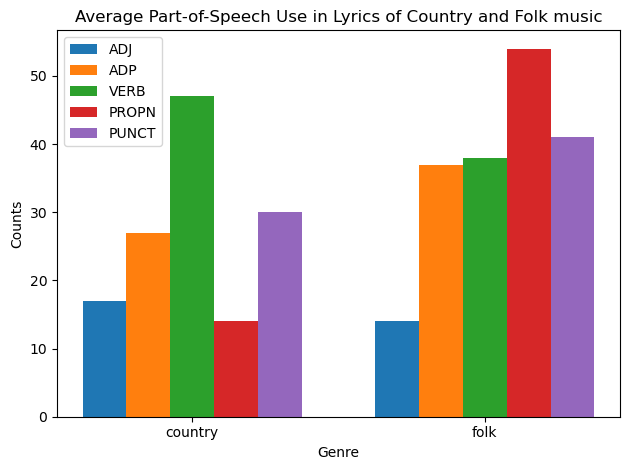

In [18]:
#Create Visualizations Matplotlib and NumPy 

import numpy as np

genres = average_pos_df['Genre']
categories = ['ADJ', 'ADP', 'VERB', 'PROPN', 'PUNCT']
bar_width = 0.15
x = np.arange(len(genres))

for i, category in enumerate(categories):
    plt.bar(x + i * bar_width, average_pos_df[category], bar_width, label=category)

plt.xlabel('Genre')
plt.ylabel('Counts')
plt.title('Average Part-of-Speech Use in Lyrics of Country and Folk music')
plt.xticks(x + bar_width * (len(categories) - 1) / 2, genres)
plt.legend()
plt.tight_layout()

plt.show()

This result displays the average usage counts of different parts of speech (POS) between two music genres, country and folk.

- **ADJ (Adjectives):** Country music averages around 17 uses of adjectives, while folk music averages about 14, suggesting a slightly higher preference for adjectives in country music.
  
- **ADP (Adpositions - Prepositions and Postpositions):** Folk music uses adpositions approximately 37 times on average, significantly higher than the 27 times in country music. This suggests that folk music might emphasize spatial and relational descriptions more with the use of prepositions.
  
- **VERB (Verbs):** Country music averages around 47 uses of verbs compared to about 38 times in folk music. This implies that country music might focus more on action and description of actions.
  
- **PROPN (Proper Nouns):** Folk music shows an average usage of approximately 54 proper nouns, significantly higher than the 14 in country music. This indicates a tendency in folk music to use specific names of people, places, etc.

- **PUNCT (Punctuation):** Folk music averages about 41 punctuation uses, whereas country music averages around 30. This might suggest that folk music employs richer sentence structures and pauses.

These differences highlight distinct tendencies in the usage of parts of speech between the two music genres, possibly reflecting their unique lyrical expression and stylistic characteristics.

### Named Entity Analysis

In [19]:
# Create new DataFrame for analysis purposes
ner_analysis_df = song_lyric_df[['Title','Genre', 'Named_Entities', 'NE_Words']].copy()

# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
loc_counts = ner_analysis_df['Named_Entities'].str.count('LOC')
date_counts = ner_analysis_df['Named_Entities'].str.count('DATE')
org_counts = ner_analysis_df['Named_Entities'].str.count('ORG')

# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Genre'] = ner_analysis_df["Genre"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['LOC_Counts'] = loc_counts
ner_counts_df['DATE_Counts'] = date_counts
ner_counts_df['ORG_Counts'] = org_counts

ner_counts_df

,Genre,PERSON_Counts,LOC_Counts,DATE_Counts,ORG_Counts
0,country,0,0,6,0
1,country,1,0,1,0
2,country,1,0,0,0
3,country,3,0,4,0
4,country,6,0,0,1
...,...,...,...,...,...
240,folk,1,0,1,0
241,folk,0,0,0,0
242,folk,0,0,0,0
243,folk,0,0,0,0


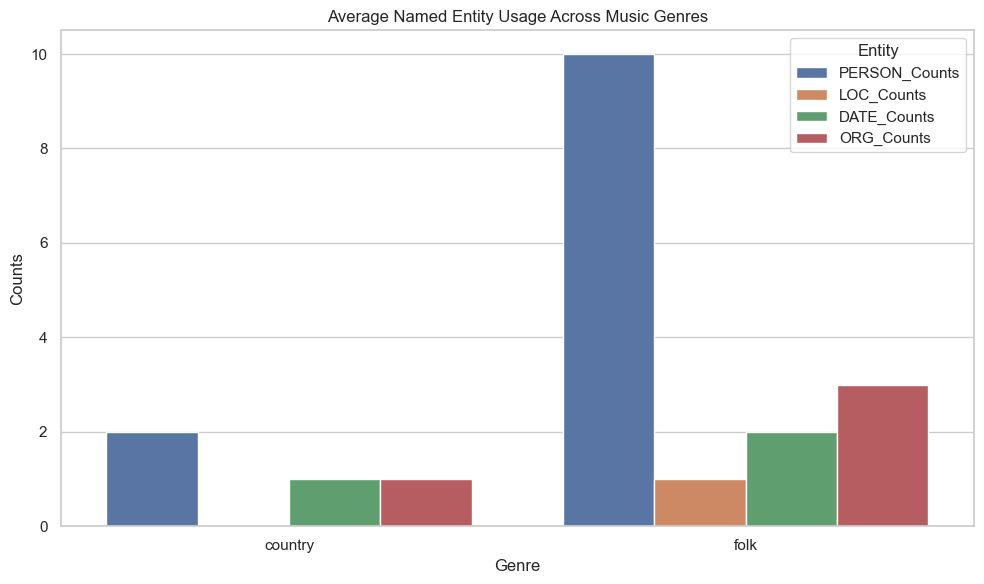

In [21]:
#Create Visualizations Using Seaborn

import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

data = average_ner_df.melt(id_vars='Genre', var_name='Entity', value_name='Counts')

sns.barplot(x='Genre', y='Counts', hue='Entity', data=data)

plt.title('Average Named Entity Usage Across Music Genres')
plt.xlabel('Genre')
plt.ylabel('Counts')

plt.legend(title='Entity')

plt.tight_layout()
plt.show()

These findings indicate the frequency of different types of named entities in the lyrics of country and folk music. For instance, folk music tends to have significantly more mentions of person names, organizations, and dates compared to country music. The lack of location mentions is more apparent in country music. These differences may reflect the unique characteristics and themes prevalent in the lyrics of these two music genres.

### Syntactic Analysis

In [22]:
import nltk

# Create new DataFrame for analysis purposes
verb_obj_pairs_df = song_lyric_df[['Title','Genre', 'Lyrics']].copy()

def extract_verb_obj_pairs_count(text):
    doc = nlp(text)
    verb_obj_pairs = [(token.head.text, token.text) for token in doc if token.dep_ == 'dobj']
    return len(verb_obj_pairs)

# Apply the function to each row in the DataFrame and create a new column
verb_obj_pairs_df['verb_obj_pairs_counts'] = verb_obj_pairs_df['Lyrics'].apply(extract_verb_obj_pairs_count)

verb_obj_pairs_df

,Title,Genre,Lyrics,verb_obj_pairs_counts
0,Born With A Beer In My Hand,country,"Granddaddy drank Heavy, and daddy drank Light\...",16
1,Last Night,country,"Last night, we let the liquor talk\nI can't re...",24
2,Everything I Love,country,I wish I woulda met you anywhere but where I d...,25
3,Man Made A Bar,country,"I sat down on a barstool, like a dern fool\n'C...",31
4,Devil Don’t Know,country,There's a bottle on the King James coaster\nMi...,14
...,...,...,...,...
240,I Can't Think About It Now,folk,If you’re just asking for a reason\nReasons ar...,11
241,To Be Completely Honest,folk,To be completely honest\nThe picture isn’t cle...,9
242,Waiting For Your Call,folk,When your restlessness has lost it’s way\nAnd ...,5
243,Right On Time,folk,Ohh ohh ohhh\nOhh ohh ohhh\nOhh ohh ohhh\n\nIf...,9


In [23]:
# Calculate average usage of verb obj pairs
average_vop_df = verb_obj_pairs_df.groupby('Genre')['verb_obj_pairs_counts'].mean().reset_index()

average_vop_df

,Genre,verb_obj_pairs_counts
0,country,19.258621
1,folk,14.837209


From this result, it can be inferred that in country music lyrics, there is a more frequent and diverse relationship between verbs and objects, suggesting that lyricists in country music tend to use action-oriented words more often, providing a more detailed description of scenes or storylines. The frequent occurrence of verb-object structures may to some extent reflect the common themes and style prevalent in country music, such as descriptions and expressions related to life, emotions, and family aspects.

### Sentiment Analysis

In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
from textblob import TextBlob

Sentiment_df = song_lyric_df[['Title','Artist','Genre', 'Lyrics']].copy()

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

Sentiment_df.loc[:, 'Sentiment'] = Sentiment_df['Lyrics'].apply(analyze_sentiment)

Sentiment_df

,Title,Artist,Genre,Lyrics,Sentiment
0,Born With A Beer In My Hand,Morgan Wallen,country,"Granddaddy drank Heavy, and daddy drank Light\...",0.226646
1,Last Night,Morgan Wallen,country,"Last night, we let the liquor talk\nI can't re...",0.054674
2,Everything I Love,Morgan Wallen,country,I wish I woulda met you anywhere but where I d...,0.303556
3,Man Made A Bar,Morgan Wallen,country,"I sat down on a barstool, like a dern fool\n'C...",0.263091
4,Devil Don’t Know,Morgan Wallen,country,There's a bottle on the King James coaster\nMi...,0.015079
...,...,...,...,...,...
240,I Can't Think About It Now,Dawes,folk,If you’re just asking for a reason\nReasons ar...,0.177307
241,To Be Completely Honest,Dawes,folk,To be completely honest\nThe picture isn’t cle...,0.340826
242,Waiting For Your Call,Dawes,folk,When your restlessness has lost it’s way\nAnd ...,0.181136
243,Right On Time,Dawes,folk,Ohh ohh ohhh\nOhh ohh ohhh\nOhh ohh ohhh\n\nIf...,0.109008


In [25]:
average_sentiment = Sentiment_df.groupby('Genre')['Sentiment'].mean().reset_index()

average_sentiment

,Genre,Sentiment
0,country,0.082834
1,folk,0.104919


In [26]:
fig = px.bar(Sentiment_df, x='Title', y='Sentiment', color='Genre', title='Sentiment Analysis of Songs by Genre', 
             labels={'Sentiment': 'Sentiment Polarity', 'Title': 'Songs'}, 
             category_orders={'Genre': ['country', 'folk']})
fig.update_xaxes(tickangle=90)
fig.show()

In [29]:
# Create an empty DataFrame to store the results
sentiment_stats = pd.DataFrame(columns=['Genre', 'Positive_Count', 'Positive_Mean', 'Positive_Percentage',
                                        'Negative_Count', 'Negative_Mean', 'Negative_Percentage'])

# Function to calculate statistics
def calculate_sentiment_stats(sentiments, genre_name):
    positive_count = sum(sentiments > 0)
    negative_count = sum(sentiments < 0)
    
    positive_mean = sentiments[sentiments > 0].mean()
    negative_mean = sentiments[sentiments < 0].mean()
    
    positive_percentage = (positive_count / len(sentiments)) * 100
    negative_percentage = (negative_count / len(sentiments)) * 100
    
    return {
        'Genre': genre_name,
        'Positive_Count': positive_count,
        'Positive_Mean': positive_mean,
        'Positive_Percentage': positive_percentage,
        'Negative_Count': negative_count,
        'Negative_Mean': negative_mean,
        'Negative_Percentage': negative_percentage
    }

# Calculate statistics for the Country music genre
country_sentiment = Sentiment_df[Sentiment_df['Genre'] == 'country']['Sentiment']
country_stats = calculate_sentiment_stats(country_sentiment, 'Country')

# Calculate statistics for the Folk music genre
folk_sentiment = Sentiment_df[Sentiment_df['Genre'] == 'folk']['Sentiment']
folk_stats = calculate_sentiment_stats(folk_sentiment, 'Folk')

# Combine the results into a list and convert to a DataFrame
combined_stats = [country_stats, folk_stats]
sentiment_stats = pd.DataFrame(combined_stats)

sentiment_stats

,Genre,Positive_Count,Positive_Mean,Positive_Percentage,Negative_Count,Negative_Mean,Negative_Percentage
0,Country,83,0.149390,71.551724,33,-0.084565,28.448276
1,Folk,102,0.156699,79.069767,25,-0.097950,19.379845


Overall, most songs in both music genres express positive emotions. Folk music slightly leans towards a higher prevalence of positive emotions compared to country music, whereas in terms of negative emotions, country music shows a slightly higher inclination compared to folk music.

In [30]:
#try to analyze the emotional inclinations of artists within specific music genres

average_sentiment = Sentiment_df.groupby(['Artist', 'Genre'])['Sentiment'].mean().reset_index()

average_sentiment

,Artist,Genre,Sentiment
0,Bob Dylan,folk,0.021005
1,Carrie Underwood,country,0.117421
2,Chris Stapleton,country,0.096881
3,Dawes,folk,0.156282
4,Jason Aldean,country,0.072188
5,Joan Baez,folk,0.092109
6,Luke Combs,country,0.093894
7,Morgan Wallen,country,0.054210
8,Neil Young,folk,0.130513
9,Phil Ochs,folk,0.116011


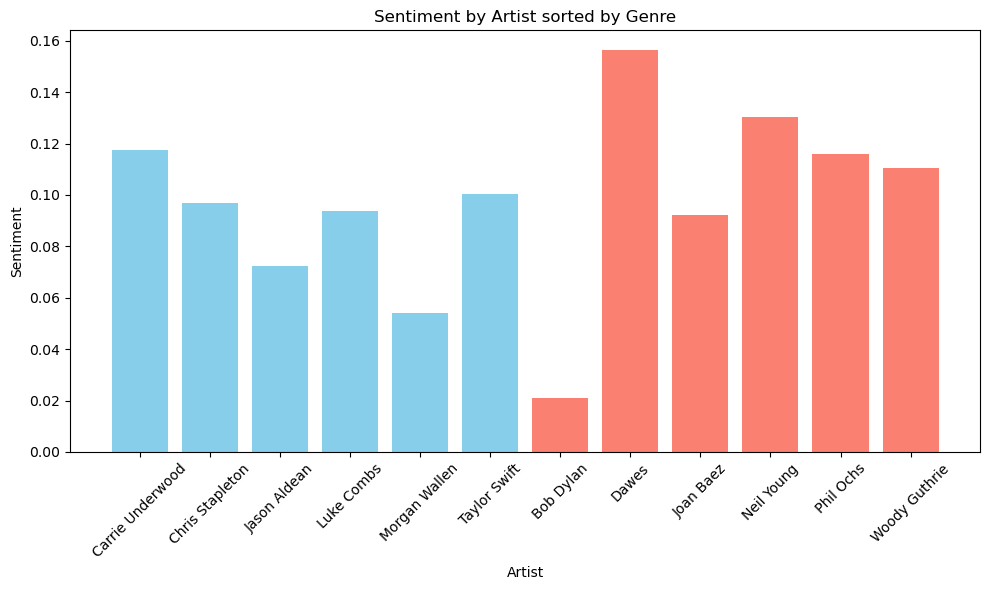

In [119]:
sorted_sentiment = average_sentiment.sort_values('Genre')

plt.figure(figsize=(10, 6))
plt.bar(sorted_sentiment['Artist'], sorted_sentiment['Sentiment'], color=sorted_sentiment['Genre'].map({'country': 'skyblue', 'folk': 'salmon'}))
plt.xlabel('Artist')
plt.ylabel('Sentiment')
plt.title('Sentiment by Artist sorted by Genre')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

The data reveals the average sentiment expression among artists in both folk and country music genres. Within the folk genre, artists tend to exhibit a relatively higher average sentiment, while in the country genre, it is slightly lower. This suggests potential variations in the styles and trends of emotional expression among artists across different music genres. 

Additionally, there are individual differences in the way each artist expresses sentiment. Some artists may lean toward more profound or diverse emotional expressions, while others may prefer concise or specific types of emotions. 

These analyses are based solely on averages, and a more comprehensive study might require considering additional factors such as lyrical content or musical themes for a more precise interpretation of the variations and changes in artists' emotional expression.

In [31]:
# Save the 'song_lyric_df' DataFrame to a CSV file named 'lyric-analysis-with-spacy.csv'

song_lyric_df.to_csv('lyric-analysis-with-spacy.csv')

### Conclusions

In the study, I discovered significant differences in the expression and themes within lyrics across music genres. Folk music tends to exhibit a more diverse emotional range and a broader spectrum of themes, potentially involving social issues, personal experiences, or traditional narratives. On the other hand, country music leans more towards themes of rural life, love, family, and individual experiences. There are also distinctions in linguistic style and vocabulary choice, where folk music might emphasize geographical settings, cultures, and traditions, while country music focuses more on action-oriented descriptions and everyday life scenarios.

Moreover, from an artist's perspective, there are differences in emotional expression across genres. Artists within folk music might delve into deeper and more varied emotional expressions, while those within country music might favor concise or specific emotional expressions. These findings shed light on the cultural diversity in music and the individual differences among artists. It's important to note that these analyses are preliminary, and a more comprehensive study might consider additional factors such as lyrical content, musical themes, etc., for a more nuanced interpretation of differences and characteristics within different music genres and among artists.